### Problem Statement

Write a Python program to implement the Simulated Annealing algorithm to find the global minimum of the function:
$$y = x^2 + 8(sin(2𝑥))^2(cos(2𝑥))^2$$
Also Plot the function and its global minima.

### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Given Function to Minimize

In [2]:
def func(x):
    return (x**2) + (8 * (np.sin(2*x)**2) * (np.cos(2*x)**2))

### Defining the SA Function

In [3]:
# Simulated Annealing
def simulated_annealing(func, x0, T0=100, Tmin=1e-3, alpha=0.9, max_iter=5000):
    x = x0
    T = T0
    best_x = x
    best_f = func(x)
    history = {'x': [x], 'f(x)': [best_f]}

    for i in range(max_iter):
        if T < Tmin:
            break
        
        x_new = x + np.random.uniform(-1, 1)
        f_new = func(x_new)
        f_curr = func(x)

        # Accept based on probability
        if f_new < f_curr or np.exp(-(f_new - f_curr)/T) > np.random.rand():
            x = x_new
        
        # Update best
        if func(x) < best_f:
            best_x = x
            best_f = func(x)
        
        history['x'].append(x)
        history['f(x)'].append(func(x))
        
        T *= alpha
    
    return best_x, best_f, history

### Executing the SA function and Generating the Plots

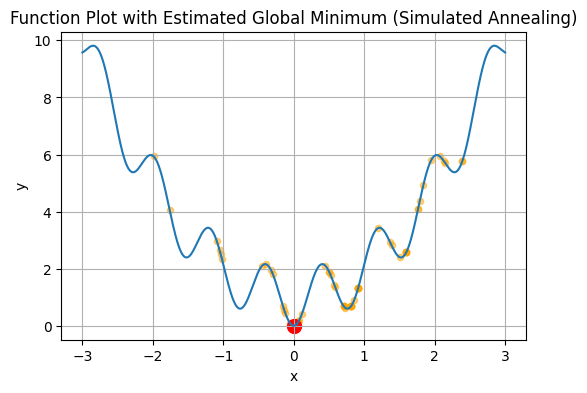

In [4]:
# Run SA
best_x, best_f, history = simulated_annealing(func, x0=np.random.uniform(-3,3))

# Generate plot
xs = np.linspace(-3, 3, 4000)
ys = func(xs)

plt.figure(figsize=(6, 4))
plt.plot(xs, ys)
plt.scatter(history['x'], history['f(x)'], s = 20, c='orange', alpha=0.5)
plt.scatter(best_x, best_f, s=100, c='red')
plt.title("Function Plot with Estimated Global Minimum (Simulated Annealing)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [5]:
print(f"The global minima of the given function is obtained at: ({best_x:.6f},{best_f:.6f}) coordinates.")

The global minima of the given function is obtained at: (-0.000597,0.000012) coordinates.
